# Ford GoBike sharing system
## by OLUWASEUN ILORI

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
A bike share program consists of making bicycles and/or electric bicycles available to the inhabitants of a city, so that they can rent a bike for short or longer distances. In particular, shared bikes are used to go to work, the gym, to school, to meet friends, etc. Thus, many stations are strategically distributed throughout the city, i.e. close to the most frequented public places, allowing people to easily and affordably rent and return the bikes from one mobility hub to another - [Source](https://www.pbsc.com/blog/2022/01/what-is-a-bike-share-program-and-how-does-it-work).Note this dataset is only for `February,2019`.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.shape)
df.dtypes

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# Checking for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> This dataset consists of `183412` rows and `16` columns. [Data dict source](https://ride.citibikenyc.com/system-data) and [Github](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-share-open-data-schema)
* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Lat/Long
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender
* Year of Birth

### What is/are the main feature(s) of interest in your dataset?

> 1. I am interested in determining the features that contribute to the duration of a trip.
2. Also, interested in figuring out what day and time of the week has the most trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* I believe the distance could determine the duration of the trip. However, the distance has to be calculated from the longitude and latitude points. This would be calculated using ` Haversine formula`. See [Here](https://www.geeksforgeeks.org/program-distance-two-points-earth/). Note that Haversine distance is not the actual distance of the ride but the direct distance(orthodromic distance) between latitude and longitude coordinates. 

_Orthodromic distance is the shortest distance between two points on a sphere (or the surface of Earth)_

* I also believe age of the user may also be a factor. Older people may not want to travel far on bikes.

### Data cleaning

In [7]:
# lets drop all rows with the null values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
print(df.shape)

(174952, 16)


We now have 174952 rows and 16 columns

## Univariate Exploration

Let's define a function to calculate distance between two geolocations.

In [9]:
def haversine_distance(lat1,lat2,lon1,lon2):
    '''
    Calculating distance between two points on the earths surface
    '''
    # radius of the earth
    r = 6371 
    
    # Converting deg to radians
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    
    # Subtract longitudes and latitudes and convert to radians
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    # Haversine formula
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

# calculating ride distance
df['ride_distance']= df.apply(lambda x: haversine_distance(x.start_station_latitude,x.end_station_latitude,x.start_station_longitude,x.end_station_longitude),axis=1)

In [10]:
base_color= sb.color_palette()[0]
def plot_countplot(dataframe:pd.DataFrame,x_var:str):
    '''
    For easier plotting of count plots
    '''
    plt.figure(figsize=[8,5])
    sb.countplot(data=dataframe,x=x_var,color=base_color)
    plt.title(f'Distribution of {x_var}'.title(),weight='bold')
    plt.xlabel(x_var.title())
    plt.ylabel('Frequency'.title())

def plot_barplot(dataframe:pd.DataFrame,x_var:str,y_var:str,my_order:list=None):
    '''
    For easier plotting of bar plots
    '''
    plt.figure(figsize=[8,5])
    sb.barplot(data=dataframe,x=x_var,y=y_var,color=base_color,order =my_order)
    plt.title(f'Distribution of {x_var}'.title(),weight='bold')
    plt.xlabel(x_var.title())
    plt.ylabel(y_var.title())


In [11]:
# Calculate age
df['age'] = 2019 - df['member_birth_year']

In [12]:
bins = [18, 29, 39, 49, 59, 69, 79,150]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+']
df['age_range'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

In [13]:
# Getting day name
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).weekday_name

In [14]:
# Getting starting hour
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour

In [15]:
# Getting ending hour
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour

### Let's start by examining the distribution of our variable of interest : duration_sec - duration of ride

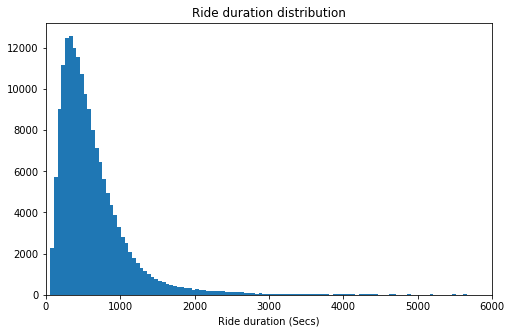

In [16]:
plt.figure(figsize=[8, 5])
plt.title('Ride duration distribution');
plt.xlabel('Ride duration (Secs)');
binsize=50
bins = np.arange(df['duration_sec'].min(), df['duration_sec'].max()+binsize, binsize)
plt.xlim([0,6000])
plt.hist(data=df, x='duration_sec', bins = bins);

As we can see the distribution is heavily skewed to the right. However, let's apply log transformation and zoom in on the plot

### Lets use log scale on the x axis and zoom in on the distribution

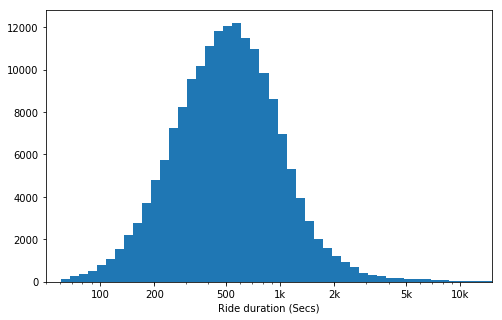

In [17]:
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim([50,15000])
plt.xticks([100,200, 500,1e3, 2e3, 5e3, 10e3], [100,200, 500,'1k', '2k', '5k', '10k'])
plt.xlabel('Ride duration (Secs)')
plt.show()

From the above plots, we can say an average ride takes at about 700 secs/12 mins. Also, most rides take between 150 and 2000 secs.

### Let's look at the ride distance distribution

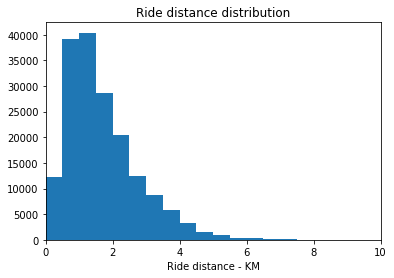

In [18]:
binsize = 0.5
bins = np.arange(df['ride_distance'].min(), df['ride_distance'].max()+binsize, binsize)
plt.hist(data=df,x='ride_distance',bins=bins);
plt.xlim([0,10])
plt.title('Ride distance distribution');
plt.xlabel('Ride distance - KM');

Here we can see most rides fall between 1 and 3 Kilometres(KM). Remember we are using orthodromic distance.

### Checking the number of subscribers and customers

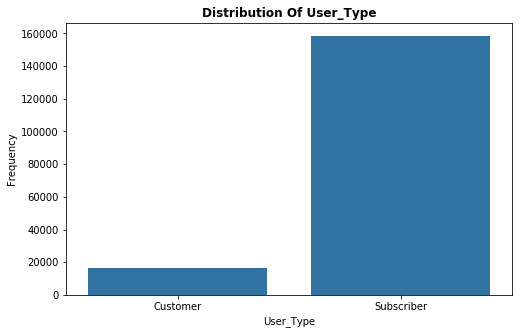

In [19]:
plot_countplot(df,'user_type')


Remember subscribers pay annually and customers usually get a 24-hour pass or 3-day pass. So it's obvious a lot of people pay annually for this bike services.

### Examining the age distribution

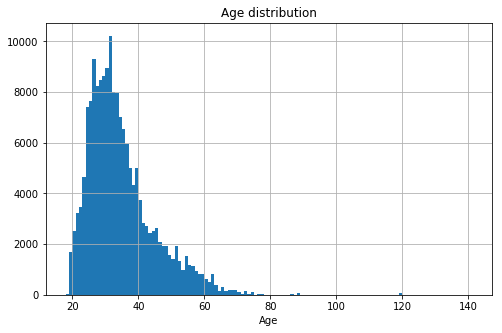

In [20]:
plt.figure(figsize=[8, 5])
plt.title('Age distribution');
plt.xlabel('Age');
binsize=1
bins = np.arange(df['age'].min(), df['age'].max()+binsize, binsize)
df['age'].hist(bins=bins);

A good number of people who use the bike services are between the ages of 20 - 40.

### How about the genders of members?

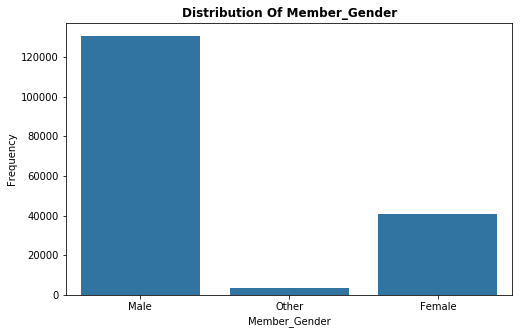

In [21]:
plot_countplot(df,'member_gender')

Men seem to love using these bike sharing services more than women.

### This bike sharing is popular for which age ranges?

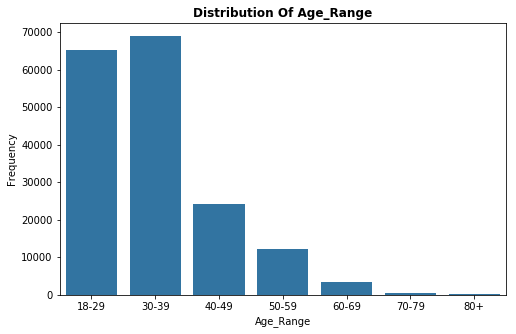

In [22]:
plot_countplot(df,'age_range')

18-29 and 30-39  have the highest number of users. It's safe to say from age 40, people rather use other means of transportation.

### At what hour of the day do most rides start and end ?

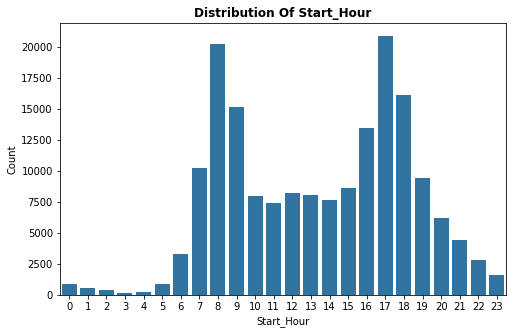

In [23]:
start_hour_count = df.groupby('start_hour').count()['duration_sec'].reset_index(name='count')
plot_barplot(start_hour_count,'start_hour','count')

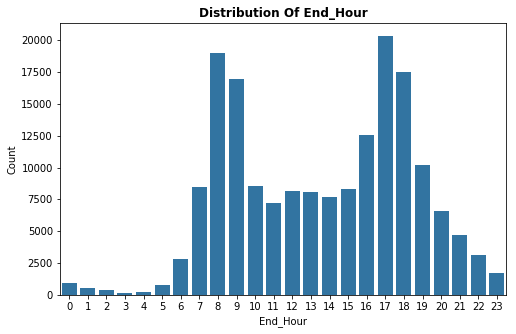

In [24]:
end_hour_count = df.groupby('end_hour').count()['duration_sec'].reset_index(name='count')
plot_barplot(end_hour_count,'end_hour','count')

From the above plots of start and end hours. We can similar values for each hour. Hence,a good number of rides start around 8-9am which clearly indicates start of work. Also most rides start around 4-6pm, which indicates close of work

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Here I looked at ride duration and ride distance. I discovered that the ride duration seemed to be heavily right skewed. I had to use log transform scale the x axis with a bin size of 0.05. This showed a normal distribution and that mst rides have an average duration of about 12 mins.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * In order to get the ride distance, I used the haversine forumla to calculate the distance using longitude and latitude coordinates.
*  The age was calculated by subtracting 2019 from the member_birth_year

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Let's plot duration of ride against ride distance

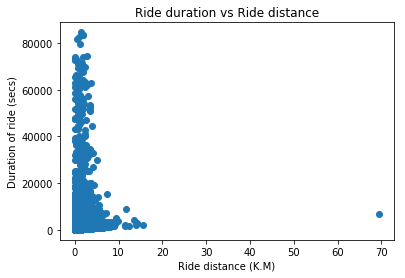

In [25]:
plt.scatter(data=df,x='ride_distance',y='duration_sec');
plt.xlabel('Ride distance (K.M)')
plt.ylabel('Duration of ride (secs)');
plt.title('Ride duration vs Ride distance');

We can notice an outlier in the ride distance.Let's investigate further

In [26]:
df.query('ride_distance > 60')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_distance,age,age_range,day_of_week,start_hour,end_hour
112038,6945,2019-02-12 14:28:44.4020,2019-02-12 16:24:30.1580,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,...,Subscriber,1985.0,Female,No,69.47,34.0,30-39,Tuesday,14,16


This is probably a mistake or someone rode 69 K.M in about 115 mins.However, let's drop this row

In [27]:
df.drop(index = 112038, inplace = True )
df.query('ride_distance > 60')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_distance,age,age_range,day_of_week,start_hour,end_hour


### Let's replot ride duration against ride_distance again and zoom in on the concentrated data points

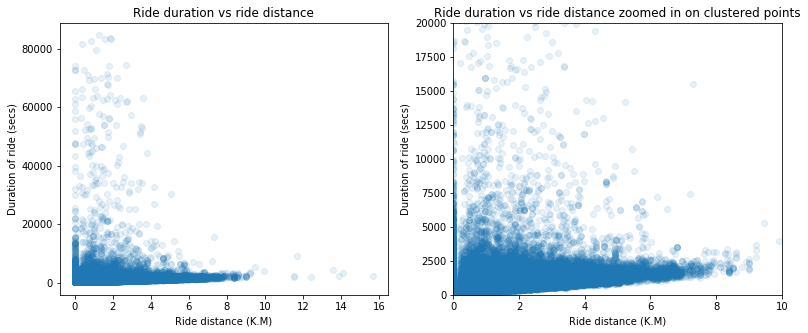

In [28]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
plt.scatter(data=df,x='ride_distance',y='duration_sec',alpha=0.1);
plt.xlabel('Ride distance (K.M)')
plt.ylabel('Duration of ride (secs)');
plt.title('Ride duration vs ride distance');

plt.subplot(1, 3, 2)
plt.scatter(data=df,x='ride_distance',y='duration_sec',alpha=0.1);
plt.xlabel('Ride distance (K.M)')
plt.ylabel('Duration of ride (secs)');
plt.xlim([0,10])
plt.ylim([0,20000]);
plt.title('Ride duration vs ride distance zoomed in on clustered points');

From the above plots, we can see most of the ride duration seem to fall below 5000 secs and distance less than 8 KM

### Comparing average ride duration between age ranges

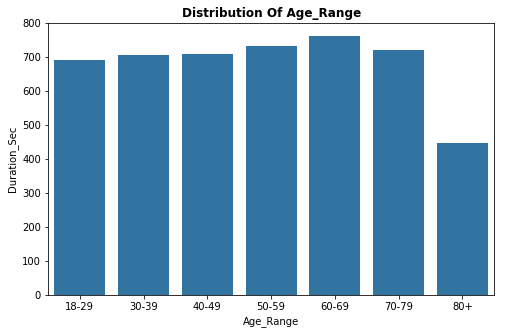

In [29]:
age_mean = df.groupby('age_range')['duration_sec'].mean().reset_index()
plot_barplot(age_mean,'age_range','duration_sec')

You would expect that young people should below <40 year should have higher duration of rides. However, those with highest average ride time are people betweeen 60-69 years. I guess this is because they are older so they ride more slowly.

### Comparing average distance between age ranges

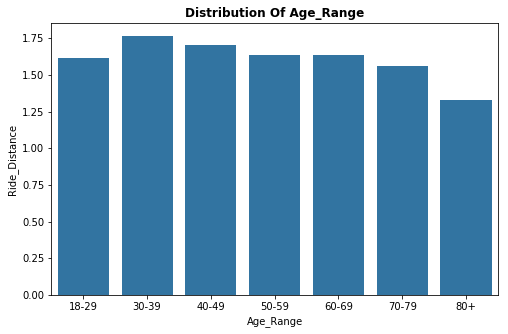

In [30]:
age_mean = df.groupby('age_range')['ride_distance'].mean().reset_index()
plot_barplot(age_mean,'age_range','ride_distance')

Even though 60-69 years people have longer ride duration, the younger adults < 40 have longer ride distance.

### Which day of the week do people have long rides?

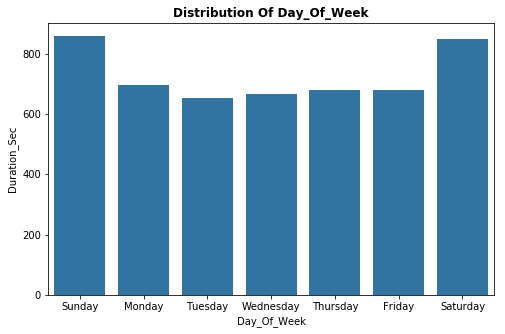

In [31]:
# which day of the week do people have the longest ride times.
day_df = df.groupby('day_of_week')['duration_sec'].mean().reset_index()
week_order=  ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plot_barplot(day_df,'day_of_week','duration_sec',my_order=week_order)

The weekends Sunday and Saturday are times when people have longer rides.

### Let's view the user types and their average ride distance and duration

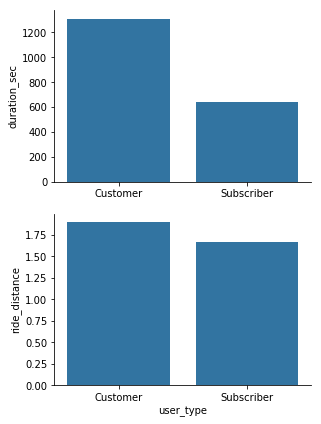

In [32]:
user_duration = df.groupby('user_type')['duration_sec'].mean().reset_index()
user_ride = df.groupby('user_type')['ride_distance'].mean().reset_index()
user_df = user_ride.merge(user_duration)

g = sb.PairGrid(data = user_df, y_vars = ['duration_sec', 'ride_distance'], x_vars = ['user_type'],
                size = 3, aspect = 1.5);
g.map(sb.barplot);

There are more subscribers than customers. However, customers have longer ride distances than subscribers. Hence, the people who subscribe don't use bikes regularly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can observe that people ride for longer times on weekends i.e Saturday and Sunday. Even though there are more subscribers(people who pay annually) than customers(people who pay daily), customers have average higher ride duration and distances than subcribers. I also observed that younger adults between age 30-39 have longer ride distance and people between 60-69 years of age have longer ride duration. This may be because they aren't fit to ride faster like the young ones. Also a good number of rides fell below 5000 secs(83 mins) and less than 8KM.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, I was surpised that the average ride duration on weekends were longer.

## Multivariate Exploration


### Plotting ride duration against age but segmenting using age ranges

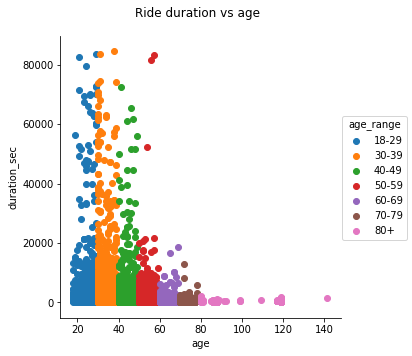

In [36]:
g = sb.FacetGrid(data = df, hue = 'age_range', size = 5)
g.map(plt.scatter, 'age', 'duration_sec')
g.add_legend();
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ride duration vs age');

This clearly shows the segmentation of different age ranges and their ride duration. Like before, users < 40 years have higher ride times. Also, we can see some 50-59 years old with high ride times like those in the 30-39 year old  

### Ride distance vs age and segmenting age range 

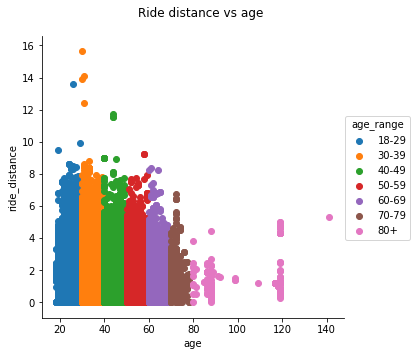

In [34]:
g = sb.FacetGrid(data = df, hue = 'age_range', size = 5)
g.map(plt.scatter, 'age', 'ride_distance')
g.add_legend();
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ride distance vs age');

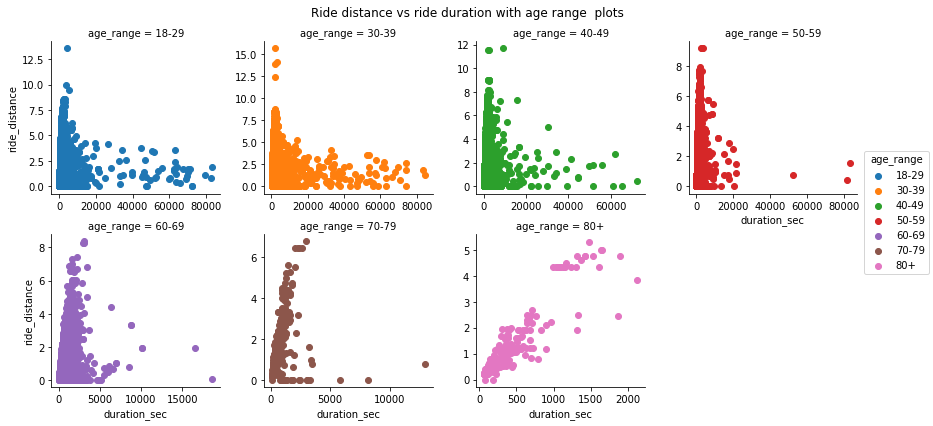

In [35]:
g = sb.FacetGrid(data = df, col='age_range' ,col_wrap=4,hue = 'age_range',sharex=False,sharey=False)
g.map(plt.scatter, 'duration_sec', 'ride_distance')
g.add_legend();
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ride distance vs ride duration with age range  plots');

You can obeserve from the above that as people grow older their ride distance and duration reduces.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> By segmenting using age ranges, I could properly see the relationship between ride distance and ride duration. The older people are, the more their ride distance and duration reduce.

### Were there any interesting or surprising interactions between features?

> 

## Conclusions

During exploration, I discovered that a good number of people who made use of the 
bike services were less than 40 years. We can infer that people above 40 prefer 
other means of transportation. Also, an average ride takes about 700 seconds (12 mins)
and most rides normally lasts between 150 to 3000 secs. By making use of orthodromic distance,
we can see that these rides are always less than 8 KM.

Another interesting observation was that though a lot of people subscribed 
annually for the bike services, customers made more use of it than subscribers,
hence, the people who subscribe don't use bikes regularly. Also, men seem to love 
using these bike sharing services more than women. When I examined the when people
start and end rides, it corresponded to normal working hours which start around 8-9am
and also 4-6pm, which indicates close of work.

I also expected people below 40 years should have higher average duration of rides. 
However, those with highest average ride times are people betweeen 60-69 years. I guess
this is because they are older so they ride more slowly. Now,even though 60-69 years people
have longer ride duration, people less than 40 years have longer ride distance. There were 
also people in 50-59 years range with high average ride duration like those between 30-39.

Finally, I also decided to check which day of the week people have longer rides and it wasn't any 
weekday, it was on Saturday and Sunday. 

## References
1. https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
2. https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python
3. Udacity classroom